In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchsummary

(input_size - Filter_size + 2*Padding) / stride + 1
 - Conv layer output size 공식

(input_size - Filter_size) / stride + 1
 - MaxPooling output size 공식

In [ ]:
class SimpleCNN(nn.Module):

  def __init__(self):
    super(SimpleCNN, self).__init__()
    self.layer1 = nn.Sequential(# input -> 28x28
        nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2), # output -> 28x28
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2) # output -> 14x14
    )
    self.layer2 = nn.Sequential(# input -> 14x14
        nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2), # output -> 14x14
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2) # output -> 7x7
    )
    self.drop_out = nn.Dropout()
    self.fc1 = nn.Linear(7*7*64, 1000)
    self.fc2 = nn.Linear(1000, 10)

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.reshape(out.size(0), -1)
    out = self.drop_out(out)
    out = self.fc1(out)
    out = self.fc2(out)
    return out


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
model = SimpleCNN()
model = model.to(device)
torchsummary.summary(model, input_size=(1, 28, 28), device='cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             832
              ReLU-2           [-1, 32, 28, 28]               0
         MaxPool2d-3           [-1, 32, 14, 14]               0
            Conv2d-4           [-1, 64, 14, 14]          51,264
              ReLU-5           [-1, 64, 14, 14]               0
         MaxPool2d-6             [-1, 64, 7, 7]               0
           Dropout-7                 [-1, 3136]               0
            Linear-8                 [-1, 1000]       3,137,000
            Linear-9                   [-1, 10]          10,010
Total params: 3,199,106
Trainable params: 3,199,106
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.68
Params size (MB): 12.20
Estimated Total Size (MB): 12.88
-------------------------------------

In [ ]:
import torchvision
import torchvision.transforms as transforms

In [ ]:
# 데이터 0~1 정규화
transform1 = transforms.Compose([transforms.ToTensor(),])
# 데이터 -1~1 정규화
# 0~1 정규화 -> (0 - 0.5) / 0.5 : -1 , (1 - 0.5) / 0.5 : 1
# 1채널 gray 이미지
transform2 = transforms.Compose([transforms.ToTensor(), transforms.Normalize( (0.5), (0.5) )])

In [ ]:
mnist_train = torchvision.datasets.FashionMNIST(root='MNIST_data/', train=True,
                                                transform=transform1,
                                                download=True)
mnist_test = torchvision.datasets.FashionMNIST(root='MNIST_data/',
                                               train=False,

                                               transform=transform1
                                               , download=True)

100%|██████████| 26421880/26421880 [00:03<00:00, 8316269.78it/s] 


Extracting MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 137008.53it/s]


Extracting MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2637160.47it/s]


Extracting MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20841966.21it/s]


Extracting MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/FashionMNIST/raw



In [ ]:
print(mnist_train.data.shape)
print(mnist_train.data[0][0])

torch.Size([60000, 28, 28])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=torch.uint8)


In [ ]:
print(mnist_train.targets.shape)
print(mnist_train.targets[0])

torch.Size([60000])
tensor(9)


In [ ]:
bs = 256

trainloader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=bs,
                                          shuffle=True,
                                          drop_last=True)
testloader = torch.utils.data.DataLoader(dataset=mnist_test,
                                         batch_size=bs,
                                         shuffle=True,
                                         drop_last=True)

In [ ]:
trainloader2 = iter(trainloader)
images, labels = next(trainloader2)
print(images.shape, labels)

torch.Size([256, 1, 28, 28]) tensor([5, 6, 9, 5, 9, 7, 2, 1, 4, 8, 3, 9, 4, 4, 5, 8, 4, 9, 0, 8, 1, 5, 2, 8,
        1, 8, 5, 6, 8, 6, 5, 1, 4, 4, 5, 8, 2, 3, 7, 2, 6, 3, 5, 7, 6, 0, 3, 4,
        9, 3, 8, 1, 6, 2, 7, 6, 4, 0, 5, 5, 5, 0, 4, 4, 2, 0, 5, 3, 5, 2, 5, 5,
        5, 8, 7, 2, 7, 6, 8, 6, 0, 4, 6, 0, 7, 0, 6, 8, 2, 0, 1, 9, 4, 7, 0, 9,
        5, 0, 1, 8, 5, 5, 9, 5, 2, 2, 6, 9, 1, 6, 9, 3, 1, 9, 6, 3, 6, 9, 3, 4,
        7, 1, 1, 2, 2, 3, 3, 2, 2, 0, 6, 0, 3, 6, 3, 0, 6, 3, 1, 3, 1, 2, 9, 4,
        9, 8, 2, 8, 3, 2, 4, 2, 3, 7, 8, 5, 6, 8, 6, 4, 4, 3, 6, 8, 5, 7, 4, 6,
        7, 5, 2, 4, 5, 9, 1, 1, 6, 0, 2, 8, 6, 1, 8, 0, 1, 1, 0, 3, 3, 1, 7, 0,
        2, 4, 5, 4, 4, 8, 7, 7, 0, 4, 4, 2, 5, 9, 9, 7, 8, 7, 5, 7, 4, 7, 2, 9,
        2, 6, 9, 5, 4, 9, 7, 2, 5, 9, 8, 5, 3, 6, 1, 1, 8, 0, 9, 7, 8, 5, 4, 5,
        2, 1, 0, 9, 8, 0, 2, 0, 2, 4, 0, 3, 7, 6, 8, 0])


In [ ]:
print(images[0][0][0])

tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])


In [ ]:
import matplotlib.pyplot as plt

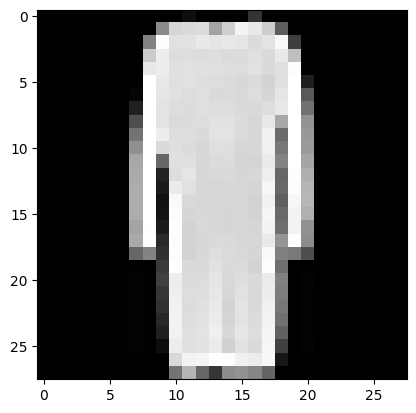

In [ ]:
plt.imshow(mnist_train.data[25], 'gray')
plt.show()

0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankel boot

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def test_accuracy(model, testloader):
  correct = 0
  total = 0
  with torch.no_grad():
    model.eval()
    for data in testloader:
      images, labels = data[0].to(device), data[1].to(device)
      outputs = model(images)

      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  print(f'Accuracy of the network : {100 * correct // total} %')

In [ ]:
for epoch in range(1):
  model.train()
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    optimizer.zero_grad()
    inputs, labels = data

    inputs = inputs.to(device)
    labels = torch.Tensor(np.eye(10)[labels]).to(device)

    outputs = model(inputs)

    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 30 == 29:
      print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 30:.3f}')
      running_loss = 0.0

  test_accuracy(model, testloader)
print("Finished")

[1, 30] loss: 1.044
[1, 60] loss: 0.561
[1, 90] loss: 0.480
[1, 120] loss: 0.456
[1, 150] loss: 0.417
[1, 180] loss: 0.402
[1, 210] loss: 0.397
Accuracy of the network : 86 %
Finished


In [ ]:
def display_test(x, y, y_pred):
  plt_r = 10
  plt_c = 23
  plt.figure(figsize=(25, 15))

  for y_pos in range(plt_r):
    for x_pos in range(plt_c):
      idx = y_pos*plt_c + x_pos

      plt.subplot(plt_r, plt_c, idx+1)
      prt = '[%d, %d]' % (y[idx], y_pred[idx])
      plt.title(prt)
      plt.imshow(x[idx].reshape(28,28), 'gray')

      ax = plt.gca()
      ax.axes.xaxis.set_visible(False)
      ax.axes.yaxis.set_visible(False)
  plt.show()

In [ ]:
testset2 = iter(testloader)
images, labels = next(testset2)
print(images[0][0][0])

tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])


In [ ]:
with torch.no_grad():
  model.to('cpu')
  model.eval()
  # y_pred = model(torch.Tensor(images))
  y_pred = model(images)
  y_pred2 = np.argmax(y_pred.numpy(), axis=1)
  y = labels

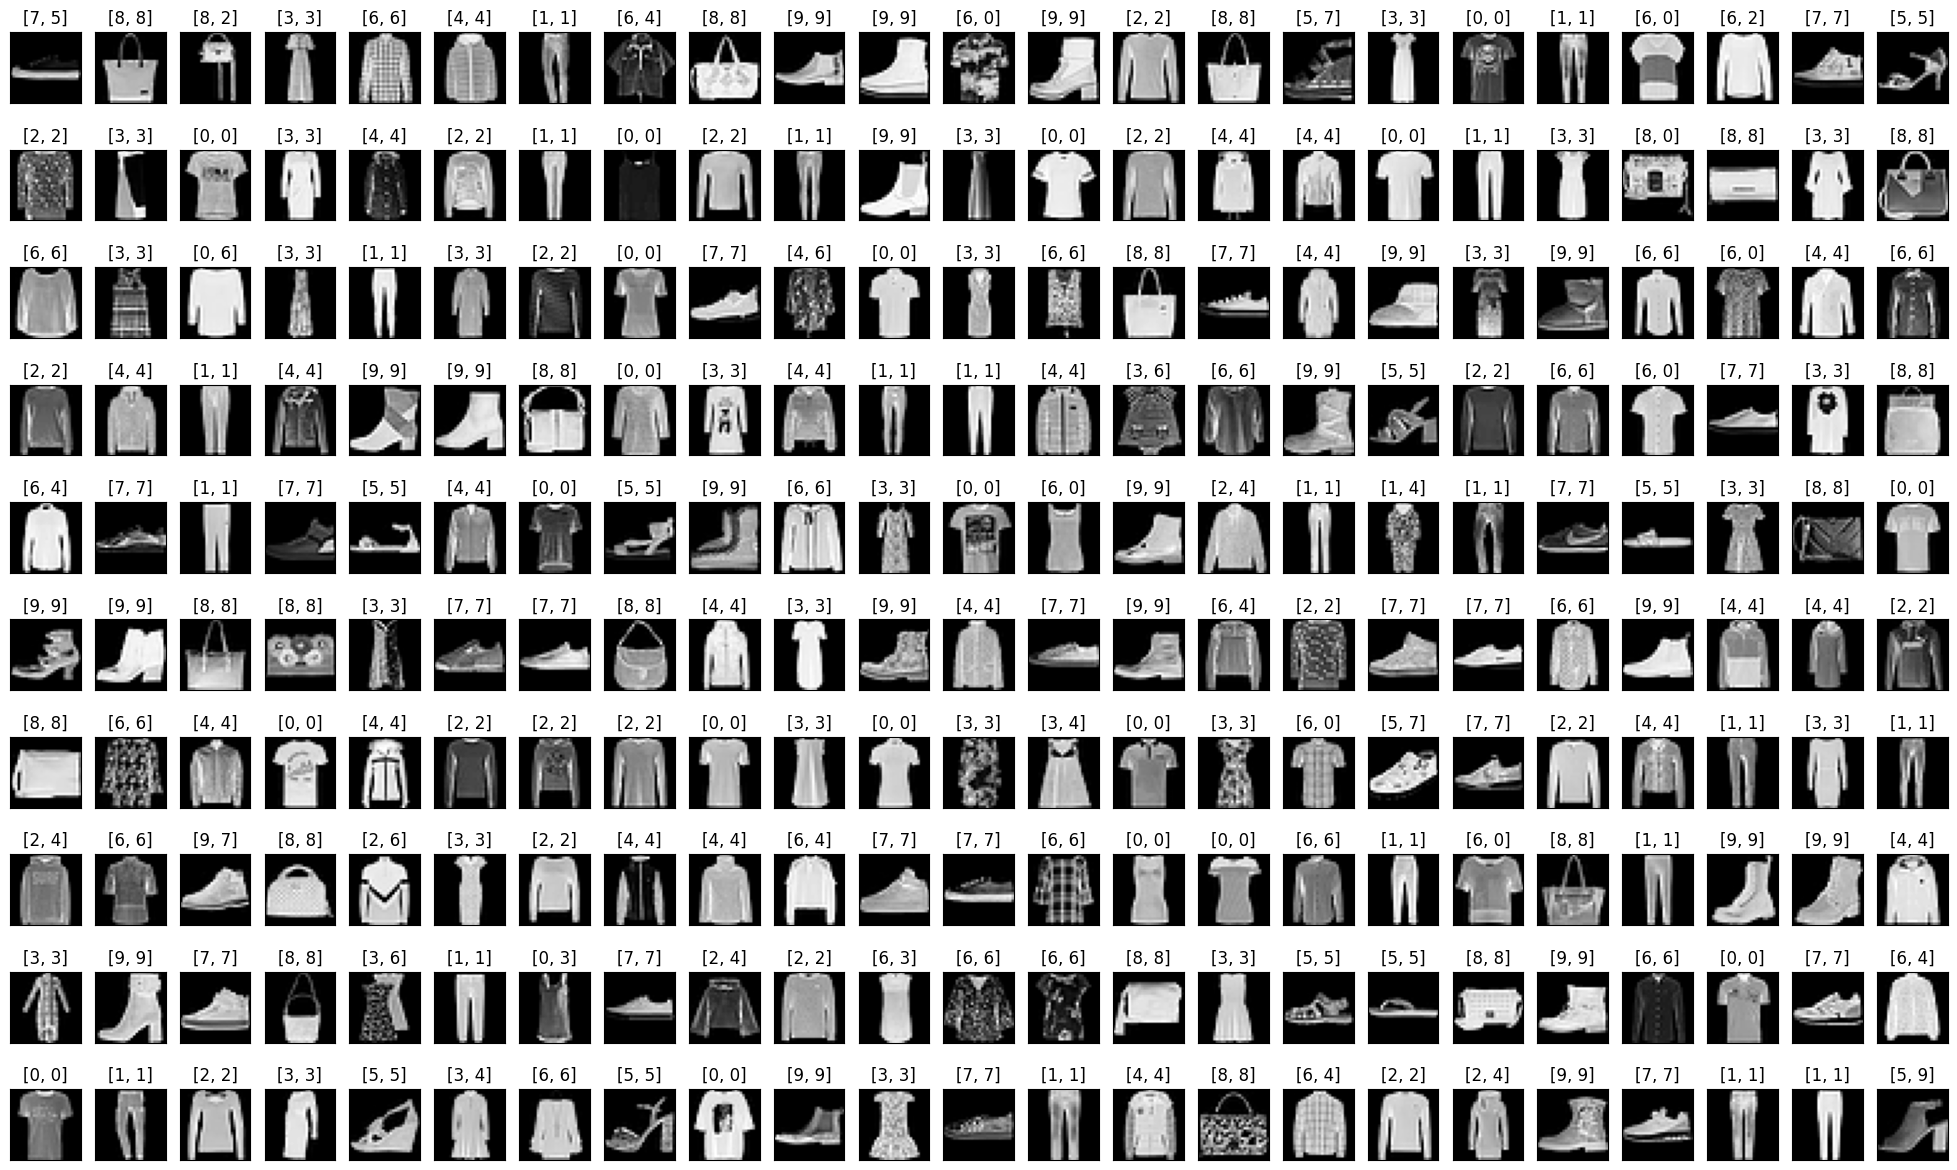

In [ ]:
display_test(images, y, y_pred2)